<a href="https://colab.research.google.com/github/angelishhha/ml_course/blob/master/lab3_categ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
sns.set(style="ticks")

data = pd.read_csv('transports.csv', sep=",")

In [2]:
data.shape

(651, 7)

In [3]:
data.dtypes

Code                  object
Transport             object
Longitude            float64
Latitude             float64
Station               object
District.Name         object
Neighborhood.Name     object
dtype: object

In [4]:
data.isnull().sum()

Code                   0
Transport              0
Longitude              0
Latitude               0
Station                0
District.Name        164
Neighborhood.Name    164
dtype: int64

In [5]:
data.head()

,Code,Transport,Longitude,Latitude,Station,District.Name,Neighborhood.Name
0,K001,Underground,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,Sarrià-Sant Gervasi,Sarrià
1,K001,Underground,2.135427,41.397791,FGC (L6) - LA BONANOVA-,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,K001,Underground,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,Nou Barris,la Trinitat Nova
3,K001,Underground,2.174473,41.460889,METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-,Nou Barris,Ciutat Meridiana
4,K001,Underground,2.168588,41.387200,METRO (L1) - CATALUNYA (Rda. Universitat)-,Eixample,la Dreta de l'Eixample


In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 651


In [7]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((651, 7), (651, 5))

In [8]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((651, 7), (487, 7))

In [9]:
data.head()

,Code,Transport,Longitude,Latitude,Station,District.Name,Neighborhood.Name
0,K001,Underground,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,Sarrià-Sant Gervasi,Sarrià
1,K001,Underground,2.135427,41.397791,FGC (L6) - LA BONANOVA-,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,K001,Underground,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,Nou Barris,la Trinitat Nova
3,K001,Underground,2.174473,41.460889,METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-,Nou Barris,Ciutat Meridiana
4,K001,Underground,2.168588,41.387200,METRO (L1) - CATALUNYA (Rda. Universitat)-,Eixample,la Dreta de l'Eixample


In [10]:
data_new_3 = data.fillna(0)
data_new_3.head()

,Code,Transport,Longitude,Latitude,Station,District.Name,Neighborhood.Name
0,K001,Underground,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,Sarrià-Sant Gervasi,Sarrià
1,K001,Underground,2.135427,41.397791,FGC (L6) - LA BONANOVA-,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,K001,Underground,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,Nou Barris,la Trinitat Nova
3,K001,Underground,2.174473,41.460889,METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-,Nou Barris,Ciutat Meridiana
4,K001,Underground,2.168588,41.387200,METRO (L1) - CATALUNYA (Rda. Universitat)-,Eixample,la Dreta de l'Eixample


**Обработка пропусков в категориальных данных**

In [11]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка District.Name. Тип данных object. Количество пустых значений 164, 25.19%.
Колонка Neighborhood.Name. Тип данных object. Количество пустых значений 164, 25.19%.


In [12]:
cat_temp_data = data[['District.Name']]
cat_temp_data.head()

,District.Name
0,Sarrià-Sant Gervasi
1,Sarrià-Sant Gervasi
2,Nou Barris
3,Nou Barris
4,Eixample


In [13]:
cat_temp_data['District.Name'].unique()

array(['Sarrià-Sant Gervasi', 'Nou Barris', 'Eixample', nan,
       'Horta-Guinardó', 'Sants-Montjuïc', 'Sant Martí', 'Les Corts',
       'Sant Andreu', 'Gràcia', 'Ciutat Vella'], dtype=object)

In [14]:
cat_temp_data[cat_temp_data['District.Name'].isnull()].shape

(164, 1)

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Sarrià-Sant Gervasi'],
       ['Sarrià-Sant Gervasi'],
       ['Nou Barris'],
       ['Nou Barris'],
       ['Eixample'],
       ['Eixample'],
       ['Sarrià-Sant Gervasi'],
       ['Eixample'],
       ['Horta-Guinardó'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Horta-Guinardó'],
       ['Eixample'],
       ['Sants-Montjuïc'],
       ['Eixample'],
       ['Horta-Guinardó'],
       ['Horta-Guinardó'],
       ['Sant Martí'],
       ['Eixample'],
       ['Sant Martí'],
       ['Les Corts'],
       ['Eixample'],
       ['Eixample'],
       ['Sant Martí'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Nou Barris'],
       ['Sants-Montjuïc'],
       ['Eixample'],
       ['Nou Barris'],
       ['Sants-Montjuïc'],
       ['Sant Martí'],
       ['Sant Andreu'],
       ['Sants-Montjuïc'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample

In [18]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi'], dtype=object)

In [19]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Sarrià-Sant Gervasi'],
       ['Sarrià-Sant Gervasi'],
       ['Nou Barris'],
       ['Nou Barris'],
       ['Eixample'],
       ['Eixample'],
       ['Sarrià-Sant Gervasi'],
       ['!!!'],
       ['Horta-Guinardó'],
       ['Eixample'],
       ['!!!'],
       ['Eixample'],
       ['Eixample'],
       ['Eixample'],
       ['Horta-Guinardó'],
       ['!!!'],
       ['Sants-Montjuïc'],
       ['Eixample'],
       ['Horta-Guinardó'],
       ['Horta-Guinardó'],
       ['Sant Martí'],
       ['Eixample'],
       ['Sant Martí'],
       ['Les Corts'],
       ['!!!'],
       ['!!!'],
       ['Sant Martí'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['Nou Barris'],
       ['Sants-Montjuïc'],
       ['Eixample'],
       ['Nou Barris'],
       ['Sants-Montjuïc'],
       ['Sant Martí'],
       ['Sant Andreu'],
       ['Sants-Montjuïc'],
       ['!!!'],
       ['Eixample'],
       ['!!!'],
       ['!!!'],
       ['Les Corts'],
       ['Eixample'],
       ['!!!'

In [20]:
np.unique(data_imp3)

array(['!!!', 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi'], dtype=object)

In [21]:
data_imp3[data_imp3=='!!!'].size

164

**Преобразование категориальных признаков в числовые**

---


In [22]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Sarrià-Sant Gervasi
1,Sarrià-Sant Gervasi
2,Nou Barris
3,Nou Barris
4,Eixample
5,Eixample
6,Sarrià-Sant Gervasi
7,Eixample
8,Horta-Guinardó
9,Eixample


**Кодирование категорий целочисленными значениями - label encoding**

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [25]:
cat_enc['c1'].unique()

array(['Sarrià-Sant Gervasi', 'Nou Barris', 'Eixample', 'Horta-Guinardó',
       'Sants-Montjuïc', 'Sant Martí', 'Les Corts', 'Sant Andreu',
       'Gràcia', 'Ciutat Vella'], dtype=object)

In [26]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
le.inverse_transform([0, 1, 2, 3])

array(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó'],
      dtype=object)

**Кодирование категорий наборами бинарных значений - one-hot encoding**

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [29]:
cat_enc.shape

(651, 1)

In [30]:
cat_enc_ohe.shape

(651, 10)

In [31]:
cat_enc_ohe

<651x10 sparse matrix of type '<class 'numpy.float64'>'
	with 651 stored elements in Compressed Sparse Row format>

In [32]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
cat_enc.head(10)

,c1
0,Sarrià-Sant Gervasi
1,Sarrià-Sant Gervasi
2,Nou Barris
3,Nou Barris
4,Eixample
5,Eixample
6,Sarrià-Sant Gervasi
7,Eixample
8,Horta-Guinardó
9,Eixample


**Pandas get_dummies - быстрый вариант one-hot кодирования**

In [34]:
pd.get_dummies(cat_enc).head()

,c1_Ciutat Vella,c1_Eixample,c1_Gràcia,c1_Horta-Guinardó,c1_Les Corts,c1_Nou Barris,c1_Sant Andreu,c1_Sant Martí,c1_Sants-Montjuïc,c1_Sarrià-Sant Gervasi
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [35]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,District.Name_Ciutat Vella,District.Name_Eixample,District.Name_Gràcia,District.Name_Horta-Guinardó,District.Name_Les Corts,District.Name_Nou Barris,District.Name_Sant Andreu,District.Name_Sant Martí,District.Name_Sants-Montjuïc,District.Name_Sarrià-Sant Gervasi,District.Name_nan
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


**МАСШТАБИРОВАНИЕ ДАННЫХ**

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

*MinMax масштабирование*

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Longitude']])

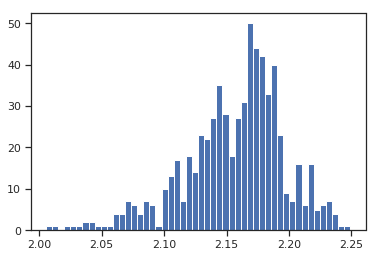

In [40]:
plt.hist(data['Longitude'], 50)
plt.show()

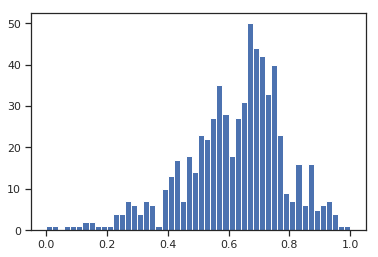

In [41]:
plt.hist(sc1_data, 50)
plt.show()

*Масштабирование данных на основе Z-оценки - StandardScaler*

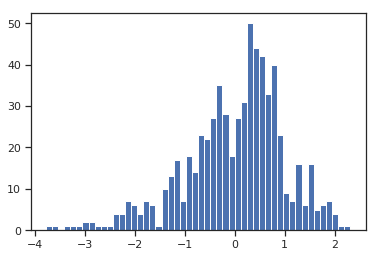

In [42]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Longitude']])

plt.hist(sc2_data, 50)
plt.show()

*Нормализация данных*

In [0]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Longitude']])

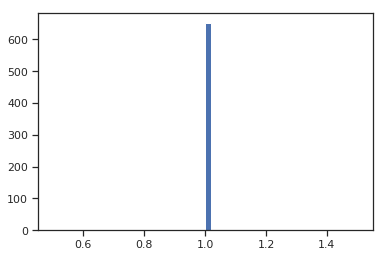

In [44]:
plt.hist(sc3_data, 50)
plt.show()